In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv('covid_19_data.csv')

In [27]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4242,4243,03/08/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4243,4244,03/08/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4244,4245,03/08/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4245,4246,03/08/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [28]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [29]:
df

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
4242,03/08/2020,Northern Territory,Australia,0.0,0.0,0.0
4243,03/08/2020,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0
4244,03/08/2020,"Montgomery County, TX",US,0.0,0.0,0.0
4245,03/08/2020,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0


In [30]:
df=df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'})

In [31]:
df

,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
4242,03/08/2020,Northern Territory,Australia,0.0,0.0,0.0
4243,03/08/2020,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0
4244,03/08/2020,"Montgomery County, TX",US,0.0,0.0,0.0
4245,03/08/2020,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0


In [32]:
df['Date']=pd.to_datetime(df['Date'])

In [33]:
df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [34]:
df.tail(2)

,Date,State,Country,Confirmed,Deaths,Recovered
4245,2020-03-08,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0
4246,2020-03-08,"Travis, CA (From Diamond Princess)",US,0.0,0.0,0.0


In [35]:
df.head(2)

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0


In [38]:
df = df.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0
...,...,...,...,...,...
1856,Vietnam,2020-03-04,16.0,0.0,16.0
1857,Vietnam,2020-03-05,16.0,0.0,16.0
1858,Vietnam,2020-03-06,16.0,0.0,16.0
1859,Vietnam,2020-03-07,18.0,0.0,16.0


In [39]:
df.head(5)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0


In [40]:
countries=df['Country'].unique()

In [41]:
countries

array([' Azerbaijan', 'Afghanistan', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Estonia', 'Faroe Islands', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Gibraltar', 'Greece',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan',
       'Jordan', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macau', 'Mainland China', 'Malaysia',
       'Maldives', 'Malta', 'Martinique', 'Mexico', 'Moldova', 'Monaco',
       'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria',
       'North Ireland', 'North Macedonia', 

In [42]:
df['Country'].nunique()

111

In [43]:
len(countries)

111

In [47]:
# Calculate days since the first suspected case for each cou
df['Days_Since_First_Case'] =df.groupby('Country')['Date'].transform(
    lambda x: (x - x.min()).dt.days
)


    
    

In [48]:
df

,Country,Date,Confirmed,Deaths,Recovered,Days_Since_First_Case
0,Azerbaijan,2020-02-28,1.0,0.0,0.0,0
1,Afghanistan,2020-02-24,1.0,0.0,0.0,0
2,Afghanistan,2020-02-25,1.0,0.0,0.0,1
3,Afghanistan,2020-02-26,1.0,0.0,0.0,2
4,Afghanistan,2020-02-27,1.0,0.0,0.0,3
...,...,...,...,...,...,...
1856,Vietnam,2020-03-04,16.0,0.0,16.0,41
1857,Vietnam,2020-03-05,16.0,0.0,16.0,42
1858,Vietnam,2020-03-06,16.0,0.0,16.0,43
1859,Vietnam,2020-03-07,18.0,0.0,16.0,44


In [49]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

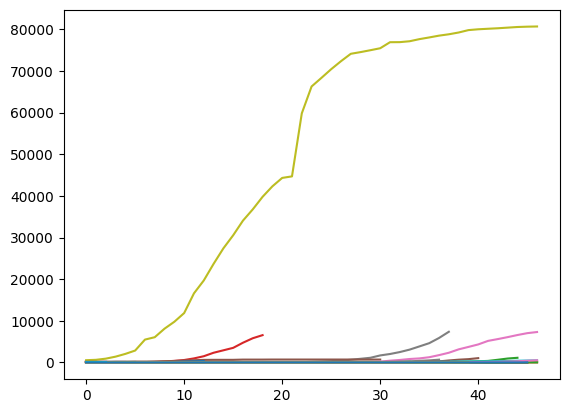

In [51]:
# Loop through each country and plot the number of cases
for country in df['Country'].unique():
    country_subset = df[df['Country'] == country]
    plt.plot(country_subset['Days_Since_First_Case'], country_subset['Confirmed'], label=country)